<a href="https://colab.research.google.com/github/koliche/Arabic-Text-Classification/blob/main/Arabic_Text_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load The Dataset**

In [ ]:
!unzip Arabiya.zip -d /content/Arabiya/
# !unzip Akhbarona.zip -d /content/Akhbarona/
# !unzip Alkhaleej.zip -d /content/Alkhaleej/
# !unzip sanad_dataset.zip -d /content/gdrive/MyDrive/TextClassification/sanad_dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/Akhbarona/Tech/02392.txt  
  inflating: /content/Akhbarona/Tech/02435.txt  
  inflating: /content/Akhbarona/Tech/02437.txt  
  inflating: /content/Akhbarona/Tech/02458.txt  
  inflating: /content/Akhbarona/Tech/02468.txt  
  inflating: /content/Akhbarona/Tech/02469.txt  
  inflating: /content/Akhbarona/Tech/02479.txt  
  inflating: /content/Akhbarona/Tech/02490.txt  
  inflating: /content/Akhbarona/Tech/02492.txt  
  inflating: /content/Akhbarona/Tech/02521.txt  
  inflating: /content/Akhbarona/Tech/02539.txt  
  inflating: /content/Akhbarona/Tech/02542.txt  
  inflating: /content/Akhbarona/Tech/02548.txt  
  inflating: /content/Akhbarona/Tech/02558.txt  
  inflating: /content/Akhbarona/Tech/02581.txt  
  inflating: /content/Akhbarona/Tech/02583.txt  
  inflating: /content/Akhbarona/Tech/02585.txt  
  inflating: /content/Akhbarona/Tech/02586.txt  
  inflating: /content/Akhbarona/Tech/02589.txt  
  inflating: /cont

In [ ]:
import os
import tensorflow as tf
import numpy as np


In [ ]:
raw_data = tf.keras.preprocessing.text_dataset_from_directory(
    '/content/Akhbarona',
    labels = "inferred",
    label_mode = "int",
    max_length = None,
    shuffle=True,
    seed=32,
    validation_split=None,
    subset=None,
)

Found 78428 files belonging to 7 classes.


In [ ]:
raw_data.class_names

['Culture', 'Finance', 'Medical', 'Politics', 'Religion', 'Sports', 'Tech']

In [ ]:
# I use this code because his complexity is o(n)
text_batch_array = np.array([s.numpy() for text_batch, label_batch in raw_data for s in text_batch])
text_batch_decoded = np.vectorize(lambda s: s.decode("utf-8"))(text_batch_array)
x = text_batch_decoded.tolist()

label_batch_array = np.array([label for text_batch, label_batch in raw_data for label in label_batch])
y = [raw_data.class_names[label] for label in label_batch_array]

print(len(x))
print(len(y))

In [ ]:
# x=[]
# y=[]
# for text_batch, label_batch in raw_data:
#     for i in range(len(text_batch)):
#         s=text_batch.numpy()[i].decode("utf-8") 
#         x.append(s)
#         y.append(raw_data.class_names[label_batch.numpy()[i]])
# print(len(x))
# print(len(y))

78428
78428


In [ ]:
# x[:] , y[:]

# **Data Visualization**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [ ]:
data =pd.DataFrame({"text":x,"label":y})

In [ ]:
data.shape

(78428, 2)

In [ ]:
data.head()

,text,label
0,عسل النحل الطبيعي ضروري لصحة الإنسان لأنه يساع...,Medical
1,أوروغواي تلحق ايطاليا بانجلترا خارج المونديال ...,Sports
2,حافظت تشيلي على لقبها بطلة لأميركا الجنوبية بف...,Sports
3,أكدت سفيرة المغرب في بوخارست السيدة فوز العشاب...,Finance
4,أخبارنا المغربية : سناء الوردي\nفي بلاغ رسمي ص...,Finance


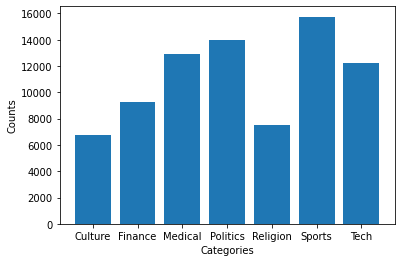

In [ ]:
#visualize the distribution of dataset 
unique, counts = np.unique(data['label'], return_counts=True)
plt.bar(unique, counts, align='center')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()

In [ ]:
data.describe()

,text,label
count,78428,78428
unique,78020,7
top,,Sports
freq,70,15755


# **Data Pre-Processing**

# **Data Cleaning**

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def removeEmoji(dataset_text_row):
    #Remove Emoji Exemple code :
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    # this is out of jupyter memorry !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    result = emoji_pattern.sub(r'',dataset_text_row)
    return result

def removeDiacritics(dataset_text_row):
    arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    result = re.sub(arabic_diacritics, '', dataset_text_row)
    return result

def remove_special_chars(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)
    # Remove English letters (if present)
    text = re.sub(r'[A-Za-z]', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text, flags=re.MULTILINE)
    return text


def removeStopwords(words):
  stop_words = set(stopwords.words('arabic'))
  result = [word for word in words if not word in stop_words]
  return result

In [ ]:
data['cleaned_text'] = data['text'].apply(removeEmoji)
data['cleaned_text'] = data['cleaned_text'].apply(removeDiacritics)
data['cleaned_text'] = data['cleaned_text'].apply(remove_special_chars)

print(data['cleaned_text'].head(20))

0     عسل النحل الطبيعي ضروري لصحة الإنسان لأنه يساع...
1     أوروغواي تلحق ايطاليا بانجلترا خارج المونديال ...
2     حافظت تشيلي على لقبها بطلة لأميركا الجنوبية بف...
3     أكدت سفيرة المغرب في بوخارست السيدة فوز العشاب...
4     أخبارنا المغربية سناء الوردي في بلاغ رسمي صادر...
5     شباط هذا قراري من أجل قطع الطريق على المتربصين...
6     صورة عن وكاﻻت وصل لاعب الوسط الكولومبي جيمس رو...
7     بالفيديو الفنانة المصرية شيرين تكشف حقيقة زواج...
8     الاتحاد الدولي للتنس يعاقب المغرب بسبب اسرائيل...
9     أعلنت شركة فيليبس في ندوة صحفية نظمتها مساء يو...
10    قال تعالى ولقد رآه نزلة أخرى عند سدرة المنتهى ...
11    للنوم أهمية خاصة في مرحلة الطفولة المبكرة لأنه...
12    أعلنت الجامعة الملكلة المغربية للدراجات أن الم...
13    علاج فطريات الأظافر أحد استخدامات البيكينج صود...
14    أخبارنا المغربية العربي المرضي يبدو أن الوضعية...
15    أخبارنا المغربية محمد الميموني بعد أن حسم تقري...
16    بدأ الممثل الأمريكي نوم هانكس قريبا تصوير مشاه...
17    اخترنا الإغاثة الفكرية بدلا من الإغاثة الم

# **Tokenization**

In [ ]:
def tokenization(dataset_text_row):
    tokens = word_tokenize(dataset_text_row)
    return tokens

In [ ]:

data['cleaned_text'] = data['cleaned_text'].apply(tokenization)
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: removeStopwords(x))
print(data['cleaned_text'].head(80))

0     [عسل, النحل, الطبيعي, ضروري, لصحة, الإنسان, لأ...
1     [أوروغواي, تلحق, ايطاليا, بانجلترا, خارج, المو...
2     [حافظت, تشيلي, لقبها, بطلة, لأميركا, الجنوبية,...
3     [أكدت, سفيرة, المغرب, بوخارست, السيدة, فوز, ال...
4     [أخبارنا, المغربية, سناء, الوردي, بلاغ, رسمي, ...
                            ...                        
75    [استعانت, هيئة, سعودية, بالمذيعة, الأردنية, عل...
76    [أعلن, نادي, ميلان, الإيطالي, توقف, لاعبه, الد...
77    [كاميرا, شخصية, تقدم, نفسها, أنها, أفضل, كامير...
78    [طوكيو, تستعد, مجموعة, سوني, العملاقة, لإطلاق,...
79    [الخراز, يمنع, المؤمن, الاستفادة, خبرات, المسل...
Name: cleaned_text, Length: 80, dtype: object


# **Lemmatization**

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word) for word in text]
    return lemmas

In [ ]:
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: lemmatization(x))
print(data['cleaned_text'].head(80))

0     [عسل, النحل, الطبيعي, ضروري, لصحة, الإنسان, لأ...
1     [أوروغواي, تلحق, ايطاليا, بانجلترا, خارج, المو...
2     [حافظت, تشيلي, لقبها, بطلة, لأميركا, الجنوبية,...
3     [أكدت, سفيرة, المغرب, بوخارست, السيدة, فوز, ال...
4     [أخبارنا, المغربية, سناء, الوردي, بلاغ, رسمي, ...
                            ...                        
75    [استعانت, هيئة, سعودية, بالمذيعة, الأردنية, عل...
76    [أعلن, نادي, ميلان, الإيطالي, توقف, لاعبه, الد...
77    [كاميرا, شخصية, تقدم, نفسها, أنها, أفضل, كامير...
78    [طوكيو, تستعد, مجموعة, سوني, العملاقة, لإطلاق,...
79    [الخراز, يمنع, المؤمن, الاستفادة, خبرات, المسل...
Name: cleaned_text, Length: 80, dtype: object


In [ ]:
data

,text,label,cleaned_text
0,عسل النحل الطبيعي ضروري لصحة الإنسان لأنه يساع...,Medical,"[عسل, النحل, الطبيعي, ضروري, لصحة, الإنسان, لأ..."
1,أوروغواي تلحق ايطاليا بانجلترا خارج المونديال ...,Sports,"[أوروغواي, تلحق, ايطاليا, بانجلترا, خارج, المو..."
2,حافظت تشيلي على لقبها بطلة لأميركا الجنوبية بف...,Sports,"[حافظت, تشيلي, لقبها, بطلة, لأميركا, الجنوبية,..."
3,أكدت سفيرة المغرب في بوخارست السيدة فوز العشاب...,Finance,"[أكدت, سفيرة, المغرب, بوخارست, السيدة, فوز, ال..."
4,أخبارنا المغربية : سناء الوردي\nفي بلاغ رسمي ص...,Finance,"[أخبارنا, المغربية, سناء, الوردي, بلاغ, رسمي, ..."
...,...,...,...
78423,أخبارنا المغربية : محمد الميموني\nأعلنت قناة ب...,Sports,"[أخبارنا, المغربية, محمد, الميموني, أعلنت, قنا..."
78424,أسدل الستار على منافسات الدور الأول من نهائيات...,Sports,"[أسدل, الستار, منافسات, الدور, الأول, نهائيات,..."
78425,توصلت دراسة فرنسية-كندية حديثة، نشرت نتائجها ف...,Medical,"[توصلت, دراسة, فرنسيةكندية, حديثة, نشرت, نتائج..."
78426,نفت وزارة الثقافة والاتصال ( قطاع الاتصال) ، م...,Culture,"[نفت, وزارة, الثقافة, والاتصال, قطاع, الاتصال,..."


In [ ]:
data.to_csv('clean_data_akhbarona.csv', index= False)

# **Encoding Arabic Text**


In [1]:
!unzip clean_data_arabiya.zip
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.bin.gz
# !gunzip cc.ar.300.bin.gz

Archive:  clean_data_arabiya.zip
  inflating: clean_data_arabiya.csv  


In [2]:
import pandas as pd
import re

data = pd.read_csv('clean_data_arabiya.csv')

### **Label Encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import numpy as np

label_encoder = LabelEncoder()
label_encoder.fit(data['label'])
Y = label_encoder.fit_transform(data['label'])

# Converts the labels to a one-hot representation
N_CLASSES = np.max(Y) + 1
Y = to_categorical(Y, N_CLASSES)
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (71246, 6)


## *Tokenization and Padding of sequences*

In [4]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# initialize Tokenizer
tokenizer = Tokenizer(num_words=40000, lower=False)
tokenizer.fit_on_texts(data['cleaned_text'])
# print(data['cleaned_text'].head())
# convert texts to sequences
sequences = tokenizer.texts_to_sequences(data['cleaned_text'])

# pad sequences
X = pad_sequences(sequences, maxlen=500)
# print(data['cleaned_text'].head())
# print shape of X
print("Shape of X: ", X.shape)

Shape of X:  (71246, 500)


## *Word Embeding*

In [ ]:
import fasttext.util
import numpy as np

# Set the path to the pre-trained embeddings file
embedding_file = 'cc.ar.300.bin'

# Load the pre-trained embeddings into the fasttext module
fasttext.util.download_model('ar', if_exists='ignore')  # download the language specific model
embedding_model = fasttext.load_model(embedding_file)

# Define the embedding dimension
embedding_dim = 300

# Create a dictionary to store the embeddings
embedding_index = {}
for word in embedding_model.words:
    embedding_index[word] = embedding_model.get_word_vector(word)

# Define a function to convert text to embeddings
def text_to_embedding(text):
    embedding_matrix = np.zeros((len(text), 500, embedding_dim))
    for i, sentence in enumerate(text):
        for j, word in enumerate(sentence.split()):
            if j < 500:
                embedding_vector = embedding_index.get(word)
                if embedding_vector is not None:
                    embedding_matrix[i][j] = embedding_vector
    return embedding_matrix

X = text_to_embedding(data['cleaned_text'])

## **Deep Learning Models**

In [7]:
# !pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.5 MB/s eta 0:00:00


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

print(tf.__version__)

2.11.0


<ipython-input-8-07c2b2e5b093>:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


## **Split The Dataset**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

# **Deep Learning Models Without Tuning**

## LSTM-CNN: done

In [ ]:
embedding_dim = 100
max_features = 40000
sequence_length = 500
max_length = 16
model = tf.keras.Sequential([
  Embedding(max_features + 1, embedding_dim,  trainable=False),
  Dropout(0.2),
  Conv1D(64, 5, activation='relu'),
  MaxPooling1D(pool_size=4),
  LSTM(64),
  Dense(N_CLASSES, activation='softmax')])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         4000100   
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
epochs = 100
hist_lstm_cnn = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=8,
    epochs=epochs)

Epoch 1/100
7125/7125 [==============================] - 75s 10ms/step - loss: 1.4316 - accuracy: 0.4219 - val_loss: 1.4262 - val_accuracy: 0.4205
Epoch 2/100
7125/7125 [==============================] - 70s 10ms/step - loss: 1.4231 - accuracy: 0.4261 - val_loss: 1.4125 - val_accuracy: 0.4205
Epoch 3/100
7125/7125 [==============================] - 75s 10ms/step - loss: 1.3313 - accuracy: 0.5270 - val_loss: 1.0987 - val_accuracy: 0.6567
Epoch 4/100
7125/7125 [==============================] - 65s 9ms/step - loss: 1.1564 - accuracy: 0.6267 - val_loss: 1.0078 - val_accuracy: 0.6939
Epoch 5/100
7125/7125 [==============================] - 60s 8ms/step - loss: 0.9647 - accuracy: 0.6825 - val_loss: 0.7641 - val_accuracy: 0.7184
Epoch 6/100
7125/7125 [==============================] - 63s 9ms/step - loss: 0.8258 - accuracy: 0.7145 - val_loss: 0.8947 - val_accuracy: 0.6854
Epoch 7/100
7125/7125 [==============================] - 62s 9ms/step - loss: 0.7528 - accuracy: 0.7327 - val_loss: 0.644

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

268/268 [==============================] - 2s 6ms/step - loss: 0.3806 - accuracy: 0.8791
Test loss: 0.38062503933906555
Test accuracy: 0.8790643215179443


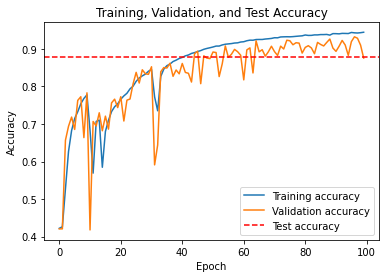

In [ ]:
# Plot the training history
train_acc = hist_lstm_cnn.history['accuracy']
val_acc = hist_lstm_cnn.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Result Comment :**

> As the final result of LSTM-CNN in the Arabic text classification, we have Test accuracy of 87.90% and Test loss of 38.06%, to get these results we used a batch of 8 and we trained the model 100 epochs.


## CNN: done


In [45]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
embedding_dim = 50
max_length = 500
max_features = 40000
# define model
model = Sequential([
        Embedding(max_features+ 1, output_dim=embedding_dim, input_length=max_length, trainable=False),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(N_CLASSES, activation='softmax')
    ])
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
hist_cnn = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
891/891 [==============================] - 8s 8ms/step - loss: 0.0113 - accuracy: 0.9979 - val_loss: 0.0991 - val_accuracy: 0.9247
Epoch 2/20
891/891 [==============================] - 6s 6ms/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.1025 - val_accuracy: 0.9230
Epoch 3/20
891/891 [==============================] - 5s 6ms/step - loss: 0.0083 - accuracy: 0.9989 - val_loss: 0.1120 - val_accuracy: 0.9196
Epoch 4/20
891/891 [==============================] - 5s 6ms/step - loss: 0.0071 - accuracy: 0.9991 - val_loss: 0.1107 - val_accuracy: 0.9219
Epoch 5/20
891/891 [==============================] - 6s 6ms/step - loss: 0.0060 - accuracy: 0.9993 - val_loss: 0.1103 - val_accuracy: 0.9226
Epoch 6/20
891/891 [==============================] - 5s 6ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.1209 - val_accuracy: 0.9189
Epoch 7/20
891/891 [==============================] - 6s 6ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.1172 - val_accuracy: 0.9207
Epoch 

In [48]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

268/268 [==============================] - 1s 3ms/step - loss: 0.1559 - accuracy: 0.9198
Test loss: 0.15592420101165771
Test accuracy: 0.9197660684585571


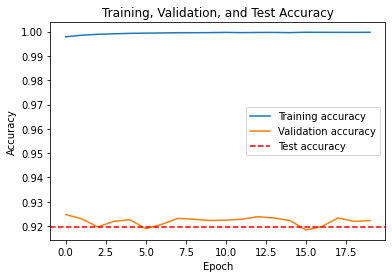

In [49]:
# Plot the training history
train_acc = hist_cnn.history['accuracy']
val_acc = hist_cnn.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## LSTM: done !!>?

In [53]:
embedding_dim = 50
max_length = 16
MAX_NB_WORDS = 40000
model = tf.keras.Sequential([
  Embedding(MAX_NB_WORDS, embedding_dim,  trainable=False),
  LSTM(64),
  Dense(N_CLASSES, activation='softmax')])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 50)          2000000   
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 2,029,830
Trainable params: 29,830
Non-trainable params: 2,000,000
_________________________________________________________________


In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
# Train the model on the train set
epochs = 100
hist_lstm = model.fit(
    X_train,y_train,
    batch_size=64,
    validation_data= (X_val, y_val),
    epochs=epochs)

Epoch 1/100
891/891 [==============================] - 20s 20ms/step - loss: 1.3991 - accuracy: 0.4608 - val_loss: 1.2470 - val_accuracy: 0.5958
Epoch 2/100
891/891 [==============================] - 17s 19ms/step - loss: 1.1948 - accuracy: 0.6039 - val_loss: 1.1557 - val_accuracy: 0.6211
Epoch 3/100
891/891 [==============================] - 17s 19ms/step - loss: 1.1364 - accuracy: 0.6197 - val_loss: 1.0864 - val_accuracy: 0.6286
Epoch 4/100
891/891 [==============================] - 17s 19ms/step - loss: 1.1155 - accuracy: 0.6187 - val_loss: 1.2668 - val_accuracy: 0.5328
Epoch 5/100
891/891 [==============================] - 17s 19ms/step - loss: 1.1487 - accuracy: 0.6144 - val_loss: 1.1058 - val_accuracy: 0.6296
Epoch 6/100
891/891 [==============================] - 17s 20ms/step - loss: 1.0471 - accuracy: 0.6466 - val_loss: 0.9676 - val_accuracy: 0.6804
Epoch 7/100
891/891 [==============================] - 17s 19ms/step - loss: 0.9638 - accuracy: 0.6777 - val_loss: 1.1680 - val_ac

In [56]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

268/268 [==============================] - 3s 9ms/step - loss: 0.1924 - accuracy: 0.9455
Test loss: 0.19239813089370728
Test accuracy: 0.9454970955848694


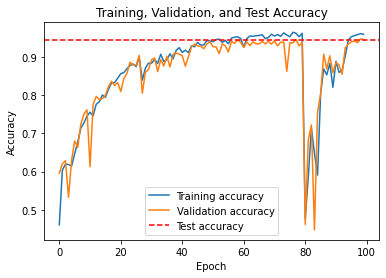

In [57]:
# Plot the training history
train_acc = hist_lstm.history['accuracy']
val_acc = hist_lstm.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## DNN: done

In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
MAX_SEQUENCE_LENGTH = 500
MAX_NB_WORDS = 40000
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)

embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 50)           2000000   
                                                                 
 global_average_pooling1d (G  (None, 50)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 6)                 306       
                                                                 
Total params: 2,000,306
Trainable params: 2,000,306
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model on the train set
hist_dnn = model.fit(X_train, y_train, validation_data= (X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10
891/891 [==============================] - 41s 46ms/step - loss: 0.1370 - accuracy: 0.9783 - val_loss: 0.1250 - val_accuracy: 0.9789
Epoch 2/10
891/891 [==============================] - 39s 44ms/step - loss: 0.0948 - accuracy: 0.9827 - val_loss: 0.1009 - val_accuracy: 0.9811
Epoch 3/10
891/891 [==============================] - 38s 43ms/step - loss: 0.0727 - accuracy: 0.9853 - val_loss: 0.0883 - val_accuracy: 0.9812
Epoch 4/10
891/891 [==============================] - 38s 42ms/step - loss: 0.0584 - accuracy: 0.9876 - val_loss: 0.0808 - val_accuracy: 0.9811
Epoch 5/10
891/891 [==============================] - 35s 39ms/step - loss: 0.0480 - accuracy: 0.9894 - val_loss: 0.0766 - val_accuracy: 0.9816
Epoch 6/10
891/891 [==============================] - 35s 39ms/step - loss: 0.0397 - accuracy: 0.9913 - val_loss: 0.0738 - val_accuracy: 0.9819
Epoch 7/10
891/891 [==============================] - 35s 39ms/step - loss: 0.0330 - accuracy: 0.9926 - val_loss: 0.0722 - val_accuracy:

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

268/268 [==============================] - 1s 4ms/step - loss: 0.0610 - accuracy: 0.9829
Test loss: 0.060991302132606506
Test accuracy: 0.9829239845275879


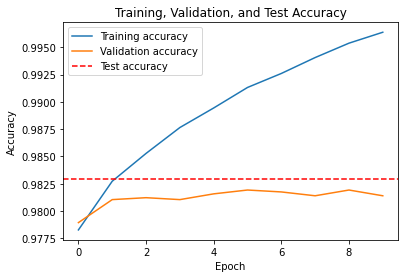

In [ ]:
# Plot the training history
train_acc = hist_dnn.history['accuracy']
val_acc = hist_dnn.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Result Comment :**

> As the final result of DNN in the Arabic text classification, we have Test accuracy of 98.29% and Test loss of 06.09%, to get these results we used a batch of 64 and we trained the model 10 epochs.

⟹**This is the model that give best result with a few nubmer of epochs.**



# **Deep Learning Models With Tuning**



## LSTM-CNN: done!!!!

In [12]:
# Define the model-building function
def build_model(hp):
    embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=512, step=32)
    filters = hp.Int('filters', min_value=64, max_value=256, step=32)
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=2)
    lstm_units = hp.Int('lstm_units', min_value=32 , max_value=128, step=32)
    max_features = hp.Int('max_features', min_value=10000 , max_value=50000, step=10000)
    model = Sequential([
        Embedding(max_features + 1, hp['embedding_dim'], trainable=False),
        Dropout(0.2),
        Conv1D(hp['filters'], hp['kernel_size'], activation='relu'),
        MaxPooling1D(pool_size=4),
        LSTM(hp['lstm_units']),
        Dense(N_CLASSES, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [13]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='lstm_cnn_tuner_results',
    project_name='lstm_cnn_tuning'
)


In [20]:
# Perform the hyperparameter search
tuner.search(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=20
)

In [16]:
# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps)

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
hist_lstm_cnn_tuner = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=100
)


Best hyperparameters: <keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7f608a0faa00>
Epoch 1/100
891/891 [==============================] - 31s 33ms/step - loss: 1.4509 - accuracy: 0.4186 - val_loss: 1.4256 - val_accuracy: 0.4205
Epoch 2/100
891/891 [==============================] - 29s 33ms/step - loss: 1.4242 - accuracy: 0.4219 - val_loss: 1.4216 - val_accuracy: 0.4205
Epoch 3/100
891/891 [==============================] - 28s 32ms/step - loss: 1.4190 - accuracy: 0.4219 - val_loss: 1.4142 - val_accuracy: 0.4205
Epoch 4/100
891/891 [==============================] - 29s 32ms/step - loss: 1.3916 - accuracy: 0.4555 - val_loss: 1.3138 - val_accuracy: 0.5100
Epoch 5/100
891/891 [==============================] - 29s 32ms/step - loss: 1.2892 - accuracy: 0.5523 - val_loss: 1.1487 - val_accuracy: 0.6405
Epoch 6/100
891/891 [==============================] - 29s 32ms/step - loss: 1.1531 - accuracy: 0.6250 - val_loss: 1.3788 - val_accuracy: 0.5098
Epoch 7/100
89

In [17]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

268/268 [==============================] - 2s 8ms/step - loss: 0.1517 - accuracy: 0.9591
Test loss: 0.15170615911483765
Test accuracy: 0.9590643048286438


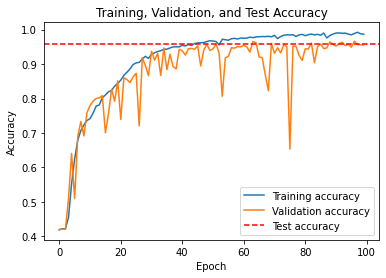

In [19]:
# Plot the training history
train_acc = hist_lstm_cnn_tuner.history['accuracy']
val_acc = hist_lstm_cnn_tuner.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# CNN

In [37]:
# Define the model-building function
def build_model(hp):
    embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=512, step=32)
    filters = hp.Int('filters', min_value=64, max_value=256, step=32)
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=2)
    max_features = hp.Int('max_features', min_value=10000 , max_value=50000, step=10000)
    model = Sequential([
        Embedding(max_features + 1, hp['embedding_dim'], trainable=False),
        Dropout(0.2),
        Conv1D(hp['filters'], hp['kernel_size'], activation='relu'),
        MaxPooling1D(pool_size=4),
        Flatten(),
        Dense(N_CLASSES, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [38]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='cnn_tuner_results',
    project_name='cnn_tuning'
)

ValueError: ignored

In [ ]:
# Perform the hyperparameter search
tuner.search(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=20
)

In [ ]:
# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps)

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
hist_cnn_tuner = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=8,
    epochs=100
)

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

In [ ]:
# Plot the training history
train_acc = hist_cnn_tuner.history['accuracy']
val_acc = hist_cnn_tuner.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# LSTM

In [58]:
# Define the model-building function
def build_model(hp):
    embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=512, step=32)
    lstm_units = hp.Int('lstm_units', min_value=32 , max_value=128, step=32)
    max_features = hp.Int('max_features', min_value=10000 , max_value=50000, step=10000)
    model = Sequential([
        Embedding(max_features + 1, hp['embedding_dim'], trainable=False),
        LSTM(hp['lstm_units']),
        Dense(N_CLASSES, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [59]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='lstm_tuner_results',
    project_name='lstm_tuning'
)

In [ ]:
# Perform the hyperparameter search
tuner.search(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=10
)

Trial 2 Complete [00h 04m 25s]
val_accuracy: 0.42052632570266724

Best val_accuracy So Far: 0.612807035446167
Total elapsed time: 00h 09m 07s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
416               |448               |embedding_dim
64                |96                |lstm_units
50000             |40000             |max_features

Epoch 1/10
891/891 [==============================] - 24s 24ms/step - loss: 1.4625 - accuracy: 0.4210 - val_loss: 1.4271 - val_accuracy: 0.4205
Epoch 2/10
891/891 [==============================] - 21s 23ms/step - loss: 1.4270 - accuracy: 0.4219 - val_loss: 1.4263 - val_accuracy: 0.4205
Epoch 3/10
891/891 [==============================] - 20s 22ms/step - loss: 1.4262 - accuracy: 0.4219 - val_loss: 1.4254 - val_accuracy: 0.4205
Epoch 4/10
891/891 [==============================] - 20s 23ms/step - loss: 1.4253 - accuracy: 0.4219 - val_loss: 1.4247 - val_accuracy: 0.4205
Epoch 5/10
891/891 [=============================

In [ ]:
# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps)

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
hist_lstm_tuner = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=100
)

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

In [ ]:
# Plot the training history
train_acc = hist_lstm_tuner.history['accuracy']
val_acc = hist_lstm_tuner.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# DNN : done

For tuner parameters of this model, there is one available parameter that is embedding_dim.

In [ ]:
def build_model(hp):
    # Define the hyperparameters
    embedding_dim = hp.Int('embedding_dim', min_value=32, max_value=512, step=32)
    max_nb_words = 40000
    MAX_SEQUENCE_LENGTH = 500
    # Define the model architecture
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedding_layer = Embedding(max_nb_words, embedding_dim,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
    embedded_sequences = embedding_layer(sequence_input)
    average = GlobalAveragePooling1D()(embedded_sequences)
    predictions = Dense(N_CLASSES, activation='softmax')(average)
    model = Model(sequence_input, predictions)

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    directory='dnn_tuner_results',
    project_name='dnn_tuning'
)

In [ ]:
# Perform the hyperparameter search
tuner.search(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=10
)

Trial 10 Complete [00h 04m 05s]
val_accuracy: 0.9815789461135864

Best val_accuracy So Far: 0.9821052551269531
Total elapsed time: 01h 38m 17s


In [ ]:
# Print the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hps)

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
hist_dnn_tuner = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=10
)

Best hyperparameters: <keras_tuner.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7f02c3232d90>
Epoch 1/10
891/891 [==============================] - 250s 280ms/step - loss: 0.6826 - accuracy: 0.8056 - val_loss: 0.2211 - val_accuracy: 0.9667
Epoch 2/10
891/891 [==============================] - 250s 281ms/step - loss: 0.1381 - accuracy: 0.9763 - val_loss: 0.1109 - val_accuracy: 0.9774
Epoch 3/10
891/891 [==============================] - 246s 276ms/step - loss: 0.0779 - accuracy: 0.9841 - val_loss: 0.0864 - val_accuracy: 0.9805
Epoch 4/10
891/891 [==============================] - 239s 268ms/step - loss: 0.0539 - accuracy: 0.9883 - val_loss: 0.0776 - val_accuracy: 0.9802
Epoch 5/10
891/891 [==============================] - 243s 272ms/step - loss: 0.0388 - accuracy: 0.9913 - val_loss: 0.0722 - val_accuracy: 0.9811
Epoch 6/10
891/891 [==============================] - 241s 271ms/step - loss: 0.0282 - accuracy: 0.9938 - val_loss: 0.0714 - val_accuracy: 0.9811
Epoch 7/

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

268/268 [==============================] - 3s 11ms/step - loss: 0.0661 - accuracy: 0.9813
Test loss: 0.0660889521241188
Test accuracy: 0.9812865257263184


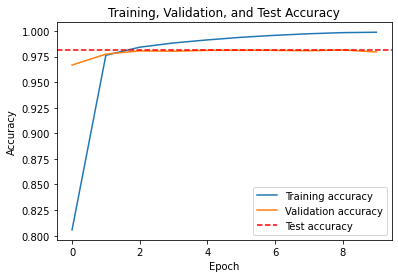

In [ ]:
# Plot the training history
train_acc = hist_dnn_tuner.history['accuracy']
val_acc = hist_dnn_tuner.history['val_accuracy']
test_acc = accuracy

plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.axhline(test_acc, color='red', linestyle='--', label='Test accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Result Comment :**

> As the final result of DNN in the Arabic text classification, we have Test accuracy of 98.12% and Test loss of 06.60%, to get these results we used a batch of 64, we trained the model 10 epochs, and the search for hyperparameter take 10 as max number of trials, but because we have one hyperparameter we get almost the same result of DNN without KerasTuner.

⟹**This is the model that give best result with a few nubmer of epochs.**